In [760]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('Top_1000_IMDb_movies_New_version.csv')
df

,ID,Movie_Name,Year_of_Release,Watch_Time,Movie_Rating,Metascore,Gross,Votes,Description
0,0,The Shawshank Redemption,1994,142,9.3,82.0,28.34,"27,77,378","Over the course of several years, two convicts..."
1,1,The Godfather,1972,175,9.2,100.0,134.97,"19,33,588","Don Vito Corleone, head of a mafia family, dec..."
2,2,The Dark Knight,2008,152,9.0,84.0,534.86,"27,54,087",When the menace known as the Joker wreaks havo...
3,3,Schindler's List,1993,195,9.0,95.0,96.90,"13,97,886","In German-occupied Poland during World War II,..."
4,4,12 Angry Men,1957,96,9.0,97.0,4.36,"8,24,211",The jury in a New York City murder trial is fr...
...,...,...,...,...,...,...,...,...,...
995,995,Philomena,2013,98,7.6,77.0,37.71,"1,02,336",A world-weary political journalist picks up th...
996,996,Un long dimanche de fiançailles,2004,133,7.6,76.0,6.17,"75,004",Tells the story of a young woman's relentless ...
997,997,Shine,1996,105,7.6,87.0,35.81,"55,589","Pianist David Helfgott, driven by his father a..."
998,998,The Invisible Man,1933,71,7.6,87.0,NaN,"37,822","A scientist finds a way of becoming invisible,..."


In [761]:
df.drop(['ID', 'Movie_Name', 'Description', 'Votes'], axis=1, inplace=True)
df

,Year_of_Release,Watch_Time,Movie_Rating,Metascore,Gross
0,1994,142,9.3,82.0,28.34
1,1972,175,9.2,100.0,134.97
2,2008,152,9.0,84.0,534.86
3,1993,195,9.0,95.0,96.90
4,1957,96,9.0,97.0,4.36
...,...,...,...,...,...
995,2013,98,7.6,77.0,37.71
996,2004,133,7.6,76.0,6.17
997,1996,105,7.6,87.0,35.81
998,1933,71,7.6,87.0,NaN


In [762]:
df.isnull().sum()

Year_of_Release      0
Watch_Time           0
Movie_Rating         0
Metascore          155
Gross              162
dtype: int64

In [763]:
df.duplicated().sum()

1

In [764]:
#Metascore
df['missing_metascore'] = df['Metascore'].isnull()
median_metascore = df['Metascore'].median()
df['Metascore'].fillna(median_metascore, inplace=True)

#Gross
df['missing_gross'] = df['Gross'].isnull()
median_gross = df['Gross'].median()
df['Gross'].fillna(median_gross, inplace=True)

In [765]:
# Filter the rows where data was imputed
imputed_rows = df[df['missing_metascore'] | df['missing_gross']]
# Remove the newly created columns
df.drop(['missing_metascore', 'missing_gross'], axis=1, inplace=True)

# Display
imputed_data = imputed_rows[['Metascore', 'Gross']]
print(imputed_data)

     Metascore    Gross
15        80.0  219.000
16        80.0   25.475
23        80.0   25.475
24        80.0   25.475
37        80.0   25.475
..         ...      ...
979       73.0   25.475
983       89.0   25.475
987       72.0   25.475
998       87.0   25.475
999       80.0   25.475

[244 rows x 2 columns]


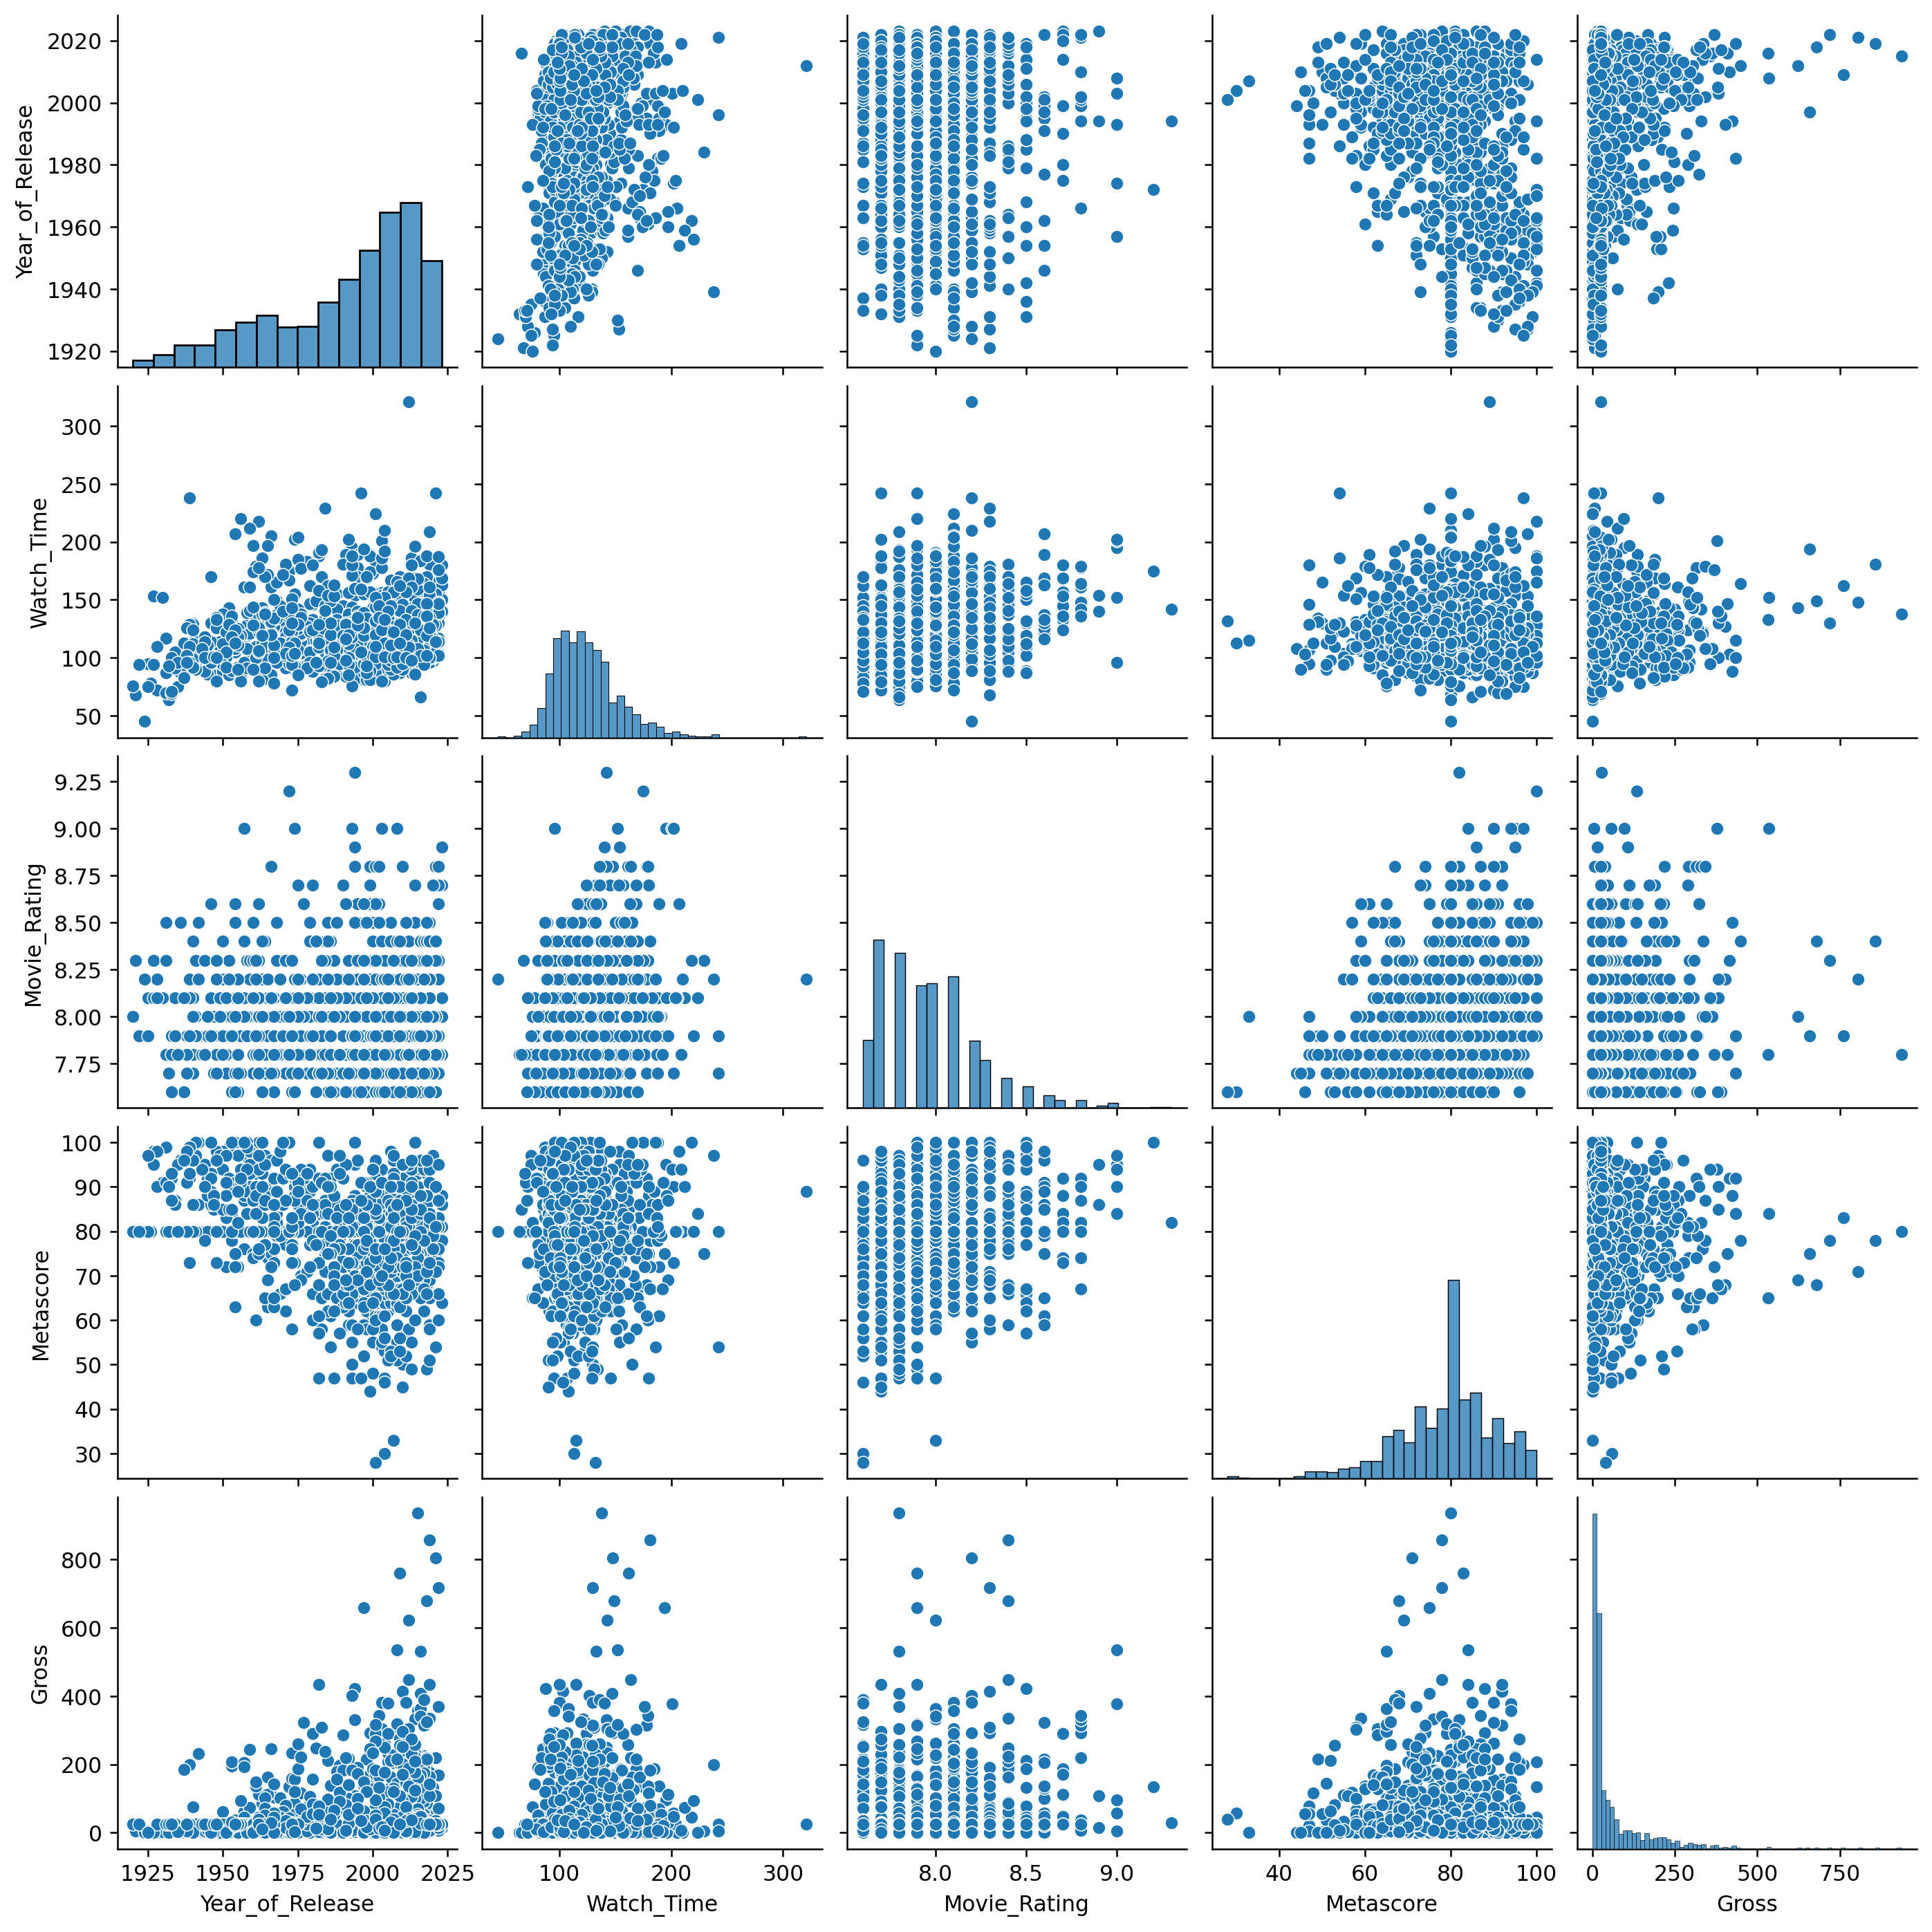

In [766]:
sns.pairplot(df)

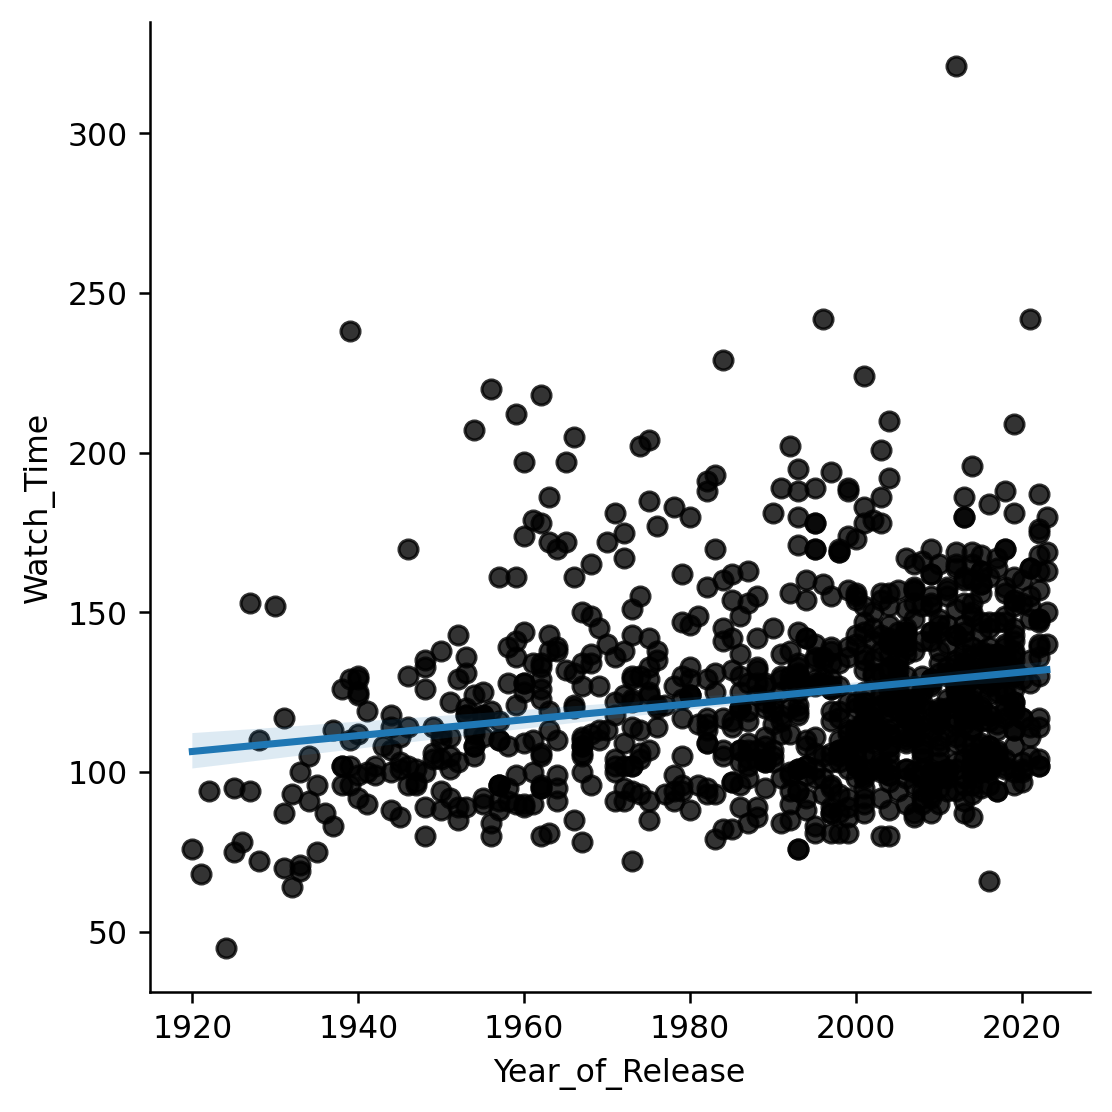

In [767]:
sns.lmplot(x="Year_of_Release", y="Watch_Time", data=df, scatter_kws={"color": "#000"})
plt.show()

<Axes: >

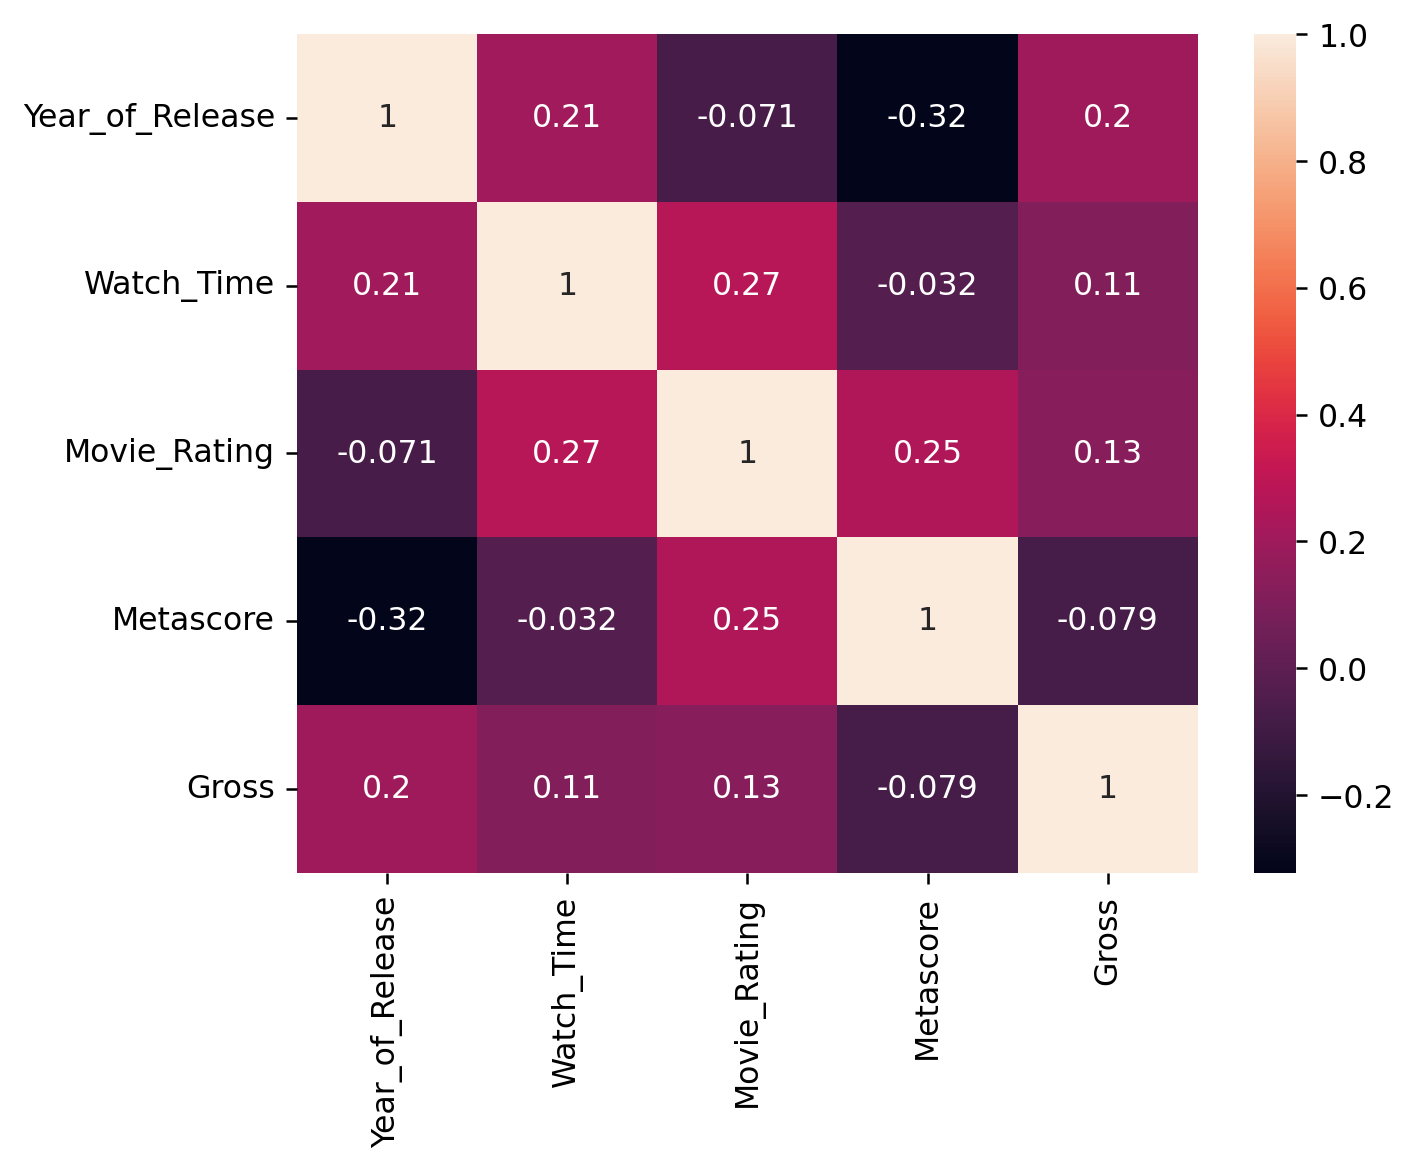

In [768]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

In [769]:
df = df.sample(frac=1)
X = df['Year_of_Release']
#X

In [770]:
def minmax_normalize(data):
    min_val = data.min()
    max_val = data.max()
    return (data - min_val) / (max_val - min_val)

X_normalized = minmax_normalize(X)

In [771]:
y = df['Watch_Time']
X_train_normalized = X_normalized.iloc[:int(0.8*len(X))]
X_test_normalized = X_normalized.iloc[int(0.8*len(X)):]
Y_train = y.iloc[:int(0.8*len(y))]
Y_test = y.iloc[int(0.8*len(y)):]

In [772]:
def Lossfunction(x, y, m, b):
    total_err = 0
    for i in range(len(x)):
        total_err += (y.iloc[i] - (m * x.iloc[i] + b)) ** 2
    return total_err / len(x)

In [773]:
def gradient_descent(m_now, b_now, x, y, L):
    m_gradient = 0
    b_gradient = 0
    
    n = len(x)
    
    for i in range(n):
        m_gradient += -(2/len(X)) * x.iloc[i] * (y.iloc[i] - (m_now * x.iloc[i] + b_now))
        b_gradient += -(2/len(X)) * (y.iloc[i] - (m_now * x.iloc[i] + b_now))
    
        #print(f"{m_gradient}, {b_gradient}")
        
    m = m_now - m_gradient * L
    b = b_now - b_gradient * L
    return m, b

In [774]:
m, b = 0, 0
L = 0.0000001
epochs = 850
mse = []

In [775]:
for i in range(epochs):
    #m, b = gradient_descent(m, b, X_train, Y_train, L)
    #loss = Lossfunction(X_train, Y_train, m, b)
    m, b = gradient_descent(m, b, X_train_normalized, Y_train, L)
    loss = Lossfunction(X_train_normalized, Y_train, m, b)
    if i % 50 == 0:
        #print(f"Epoch {i}")
        print(f"Epoch {i}, m: {m}, b: {b}, Loss: {loss}")
    mse.append(loss)
print(m, b)

Epoch 0, m: 1.3857972815533991e-05, b: 1.9773799999999994e-05, Loss: 16081.58646191866


Epoch 50, m: 0.0007067523311552681, b: 0.001008457818230267, Loss: 16081.22206229226
Epoch 100, m: 0.0013996382926273576, b: 0.001997130107594621, Loss: 16080.857671372956
Epoch 150, m: 0.002092515857332168, b: 0.0029857906682331766, Loss: 16080.493289160517
Epoch 200, m: 0.0027853850253700637, b: 0.00397443950028605, Loss: 16080.128915654772
Epoch 250, m: 0.0034782457968414076, b: 0.004963076603893352, Loss: 16079.764550855476
Epoch 300, m: 0.004171098171846561, b: 0.005951701979195198, Loss: 16079.40019476245
Epoch 350, m: 0.004863942150485886, b: 0.006940315626331694, Loss: 16079.03584737546
Epoch 400, m: 0.005556777732859743, b: 0.00792891754544295, Loss: 16078.671508694291
Epoch 450, m: 0.006249604919068487, b: 0.008917507736669075, Loss: 16078.307178718802
Epoch 500, m: 0.006942423709212479, b: 0.009906086200150176, Loss: 16077.942857448725
Epoch 550, m: 0.0076352341033920764, b: 0.010894652936026344, Loss: 16077.57854488384
Epoch 600, m: 0.008328036101707624, b: 0.01188320794443

In [776]:
def plot_regression(X, y, y_pred, log=None, title="Linear Regression"):
    plt.figure(figsize=(7,7))
    plt.rcParams['figure.dpi'] = 227
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    if log != None:
        for i in range(len(log)):
            plt.plot(X, log[i][0]*X + log[i][1], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title, fontsize=14)
    plt.xlabel('Movie Rating', fontsize=11)
    plt.ylabel('Watch Time', fontsize=11)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)
    plt.show()

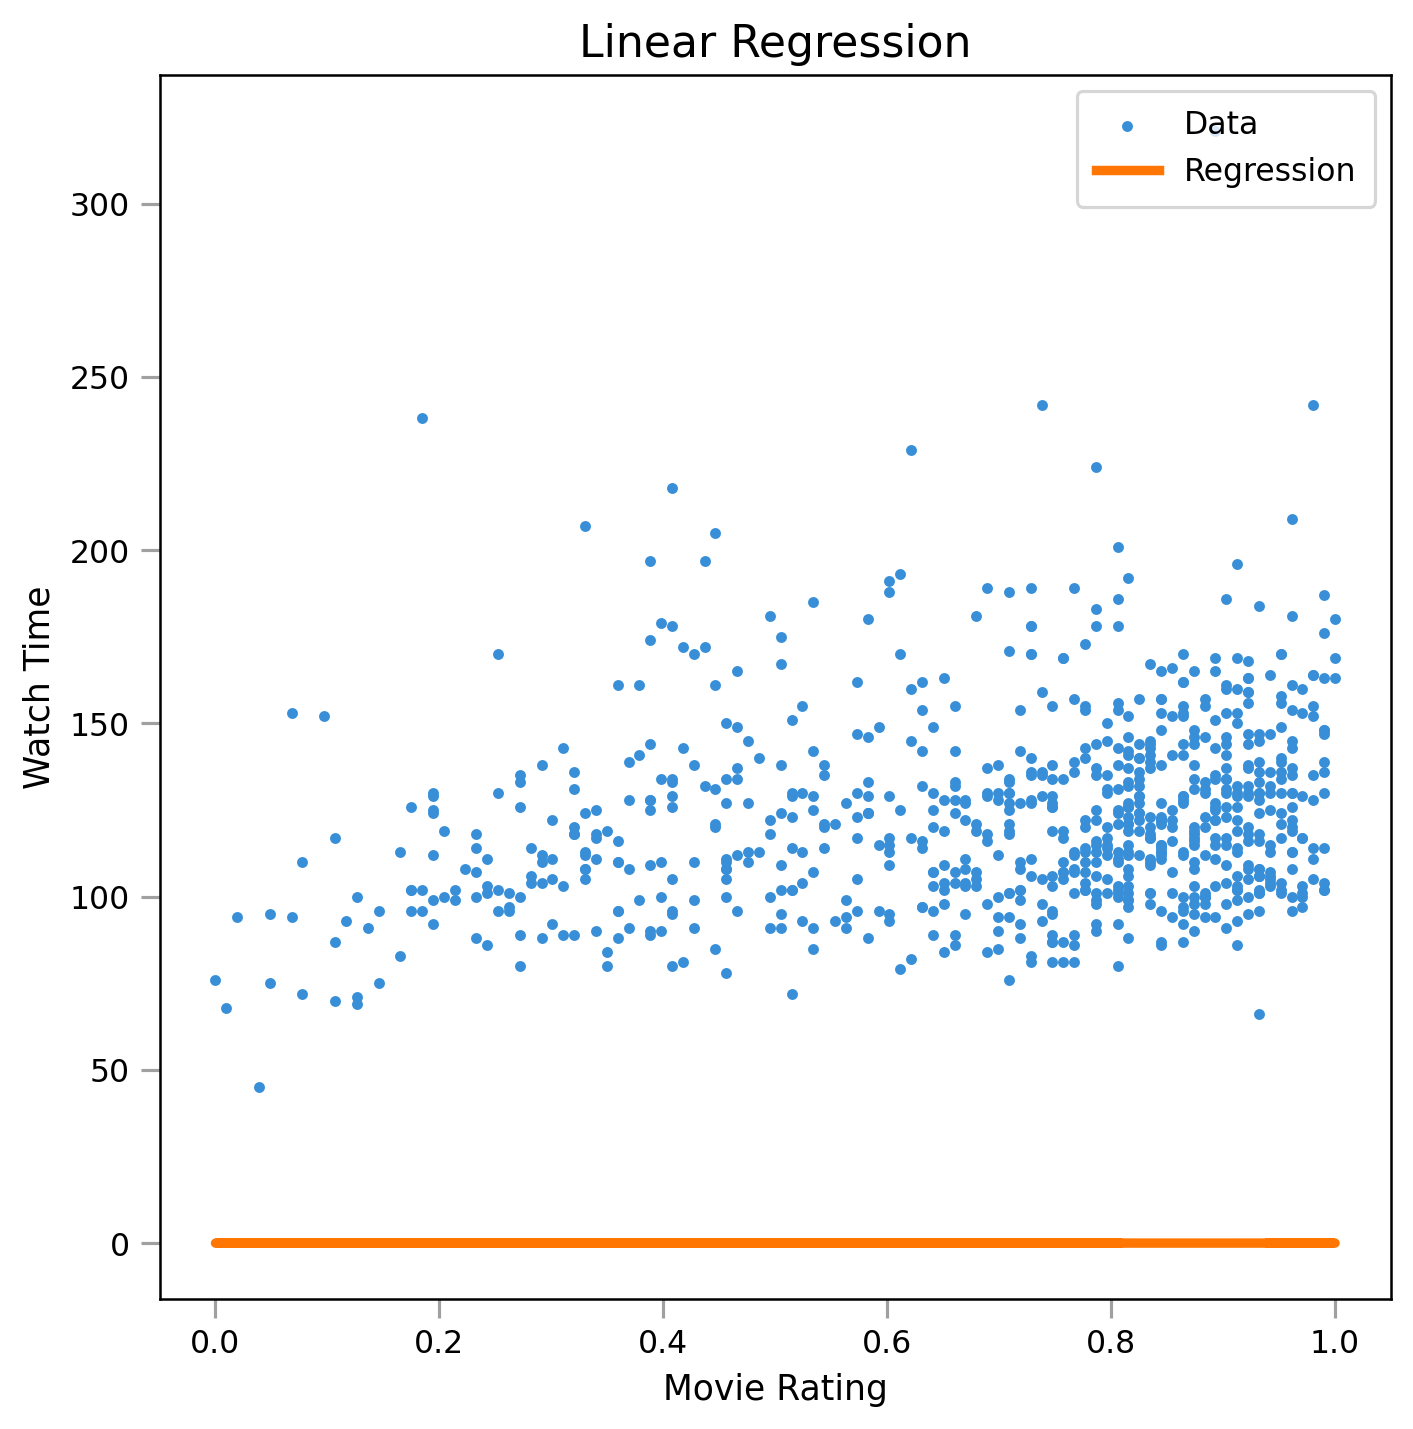

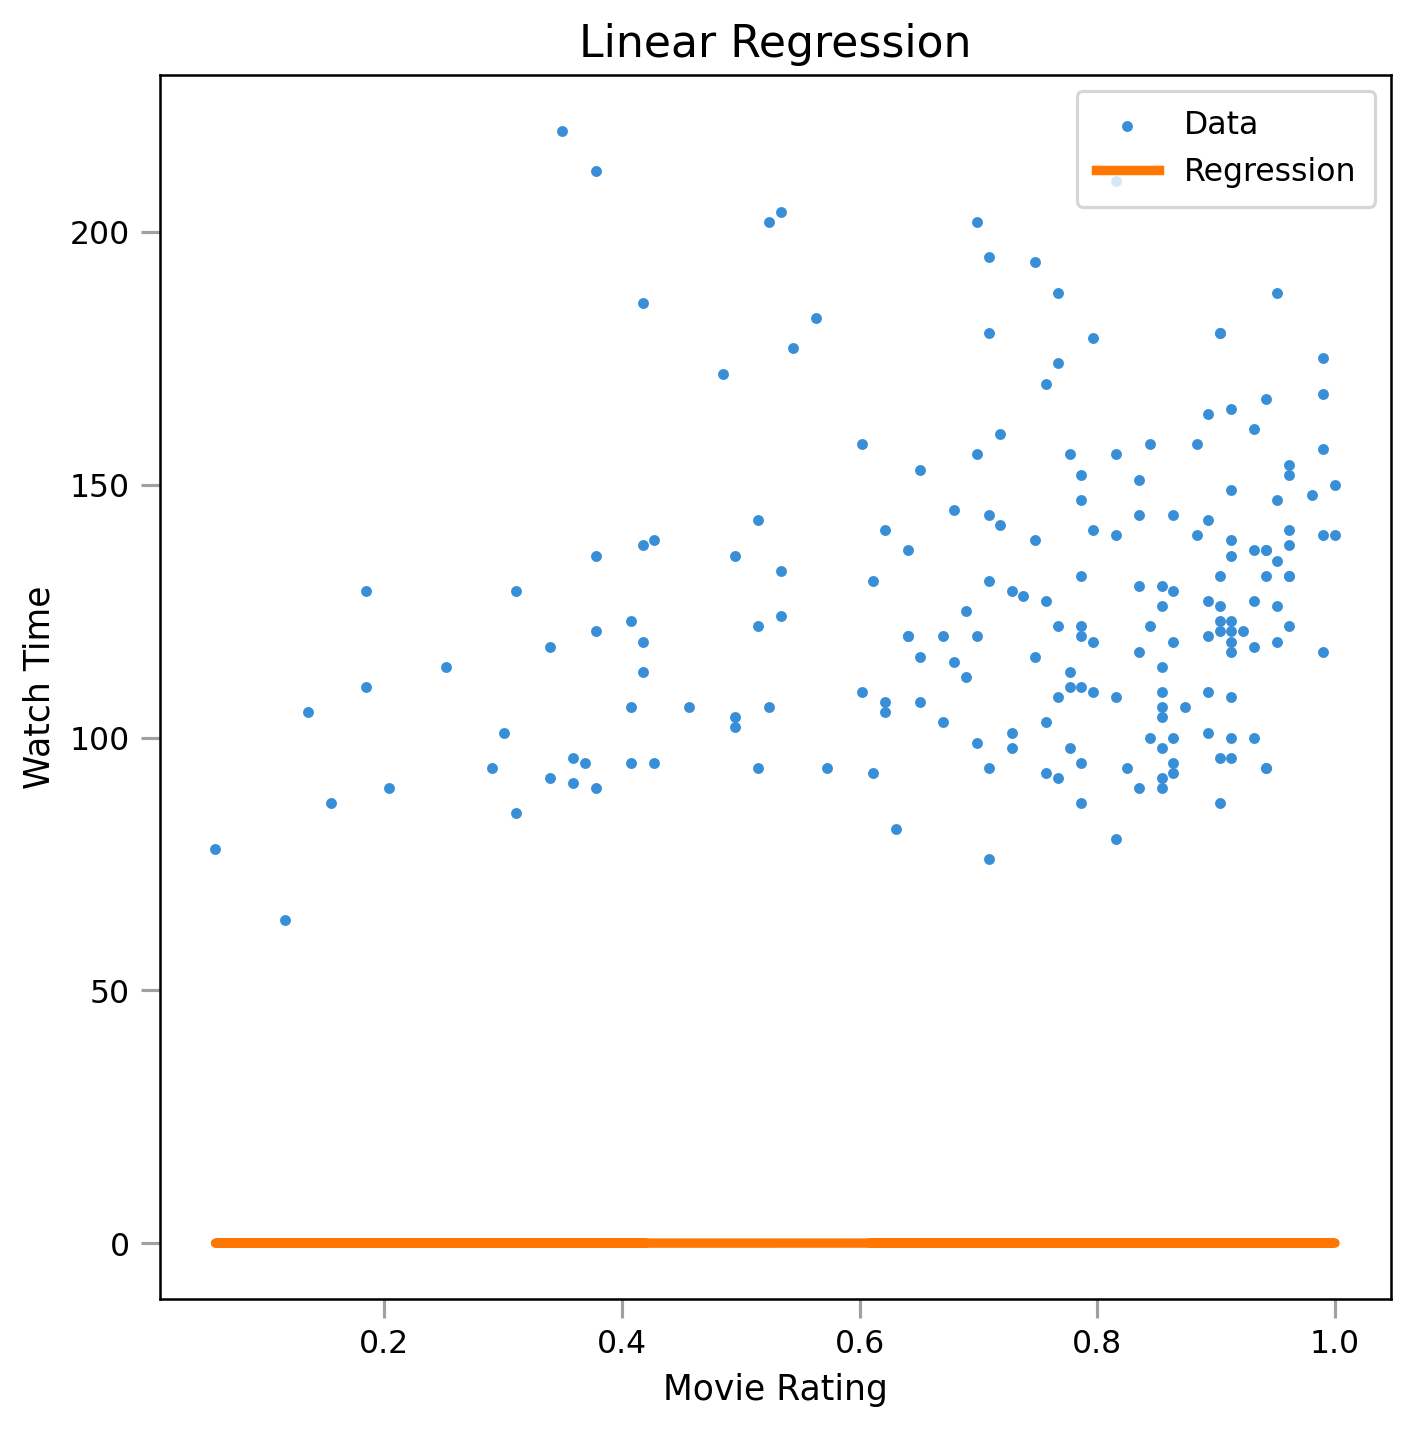

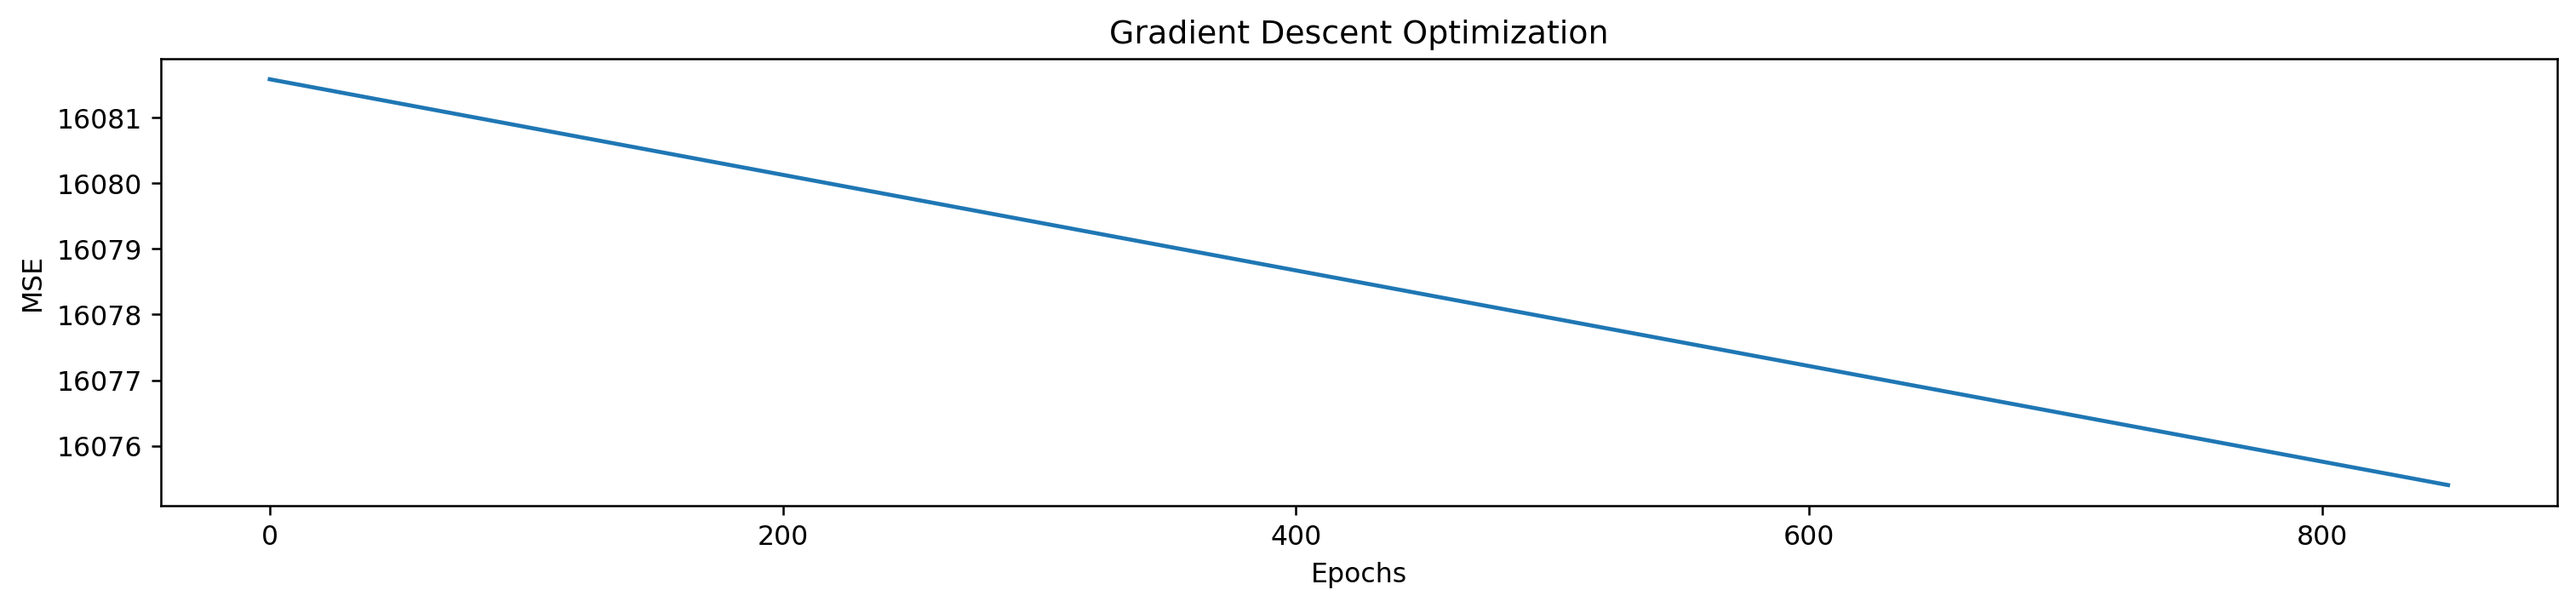

In [777]:
y_pred_normalized = m * X_train_normalized + b
y_pred_test_normalized = m * X_test_normalized + b

#plot_regression(X_train, Y_train, y_pred, title="Linear Regression")
#plot_regression(X_test, Y_test, y_pred_test, title="Linear Regression")

plot_regression(X_train_normalized, Y_train, y_pred_normalized, title="Linear Regression")
plot_regression(X_test_normalized, Y_test, y_pred_test_normalized, title="Linear Regression")

plt.figure(figsize=(16,3))
plt.rcParams['figure.dpi'] = 227
plt.plot(range(len(mse)), mse)
plt.title('Gradient Descent Optimization')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [778]:
def r_squared(y,y_pred):
    y_mean = np.full((len(y)), np.mean(y))
    err_reg = sum((y - y_pred)**2)
    err_y_mean = sum((y - y_mean)**2)
    return (1 - (err_reg/err_y_mean))

In [779]:
#r_squared(Y_test,y_pred_test)
r_squared(Y_test,y_pred_test_normalized)

-17.84905606131502

In [780]:
#r_squared(Y_train,y_pred)
r_squared(Y_train,y_pred_normalized)

-18.894495487611174

In [781]:
df_comp = pd.DataFrame({'Actual':Y_test, 'Predicted':y_pred_test_normalized})

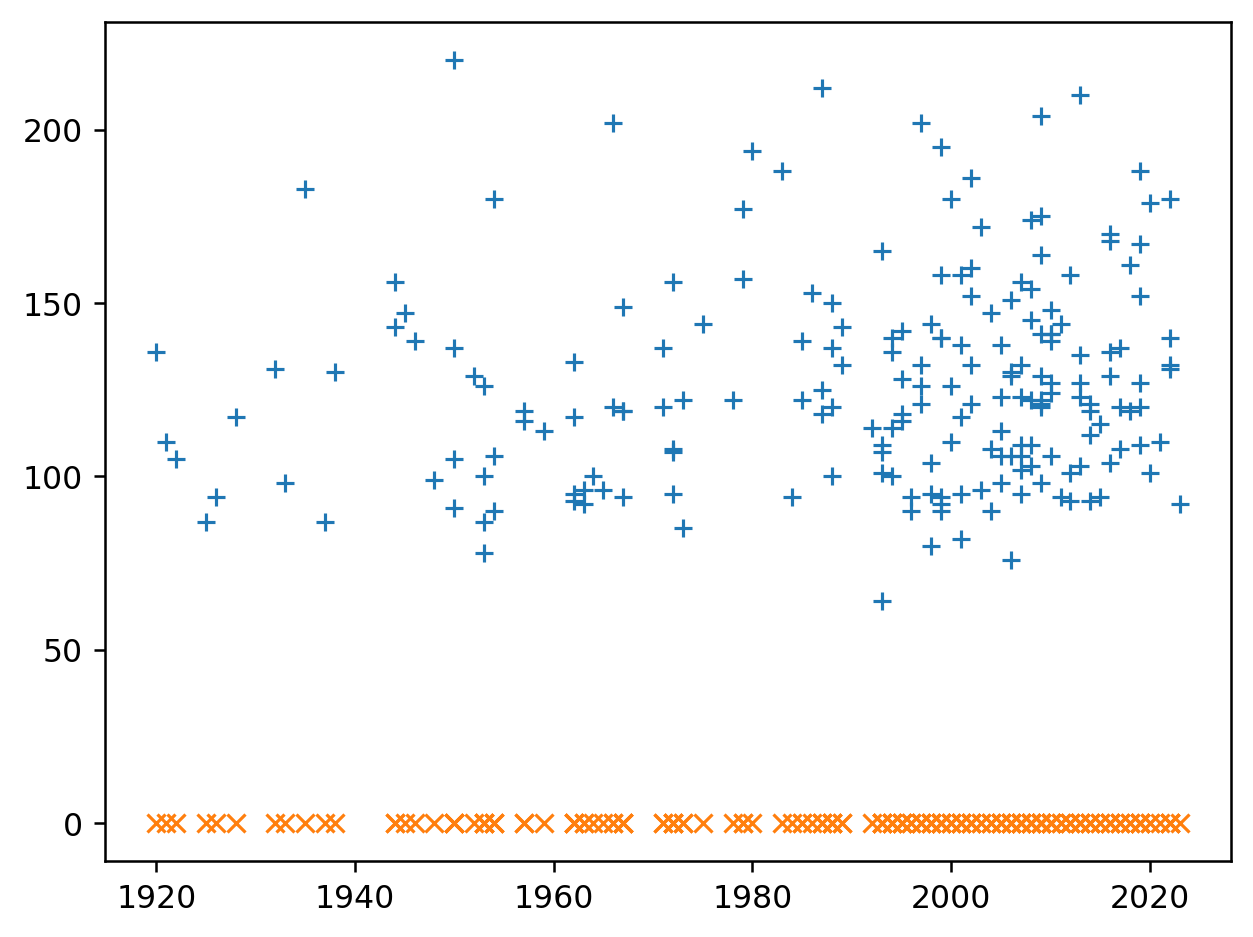

In [782]:
def compare_plot(df_comp):
    df_comp.reset_index(inplace=True)
    plt.plot(X_test, df_comp['Actual'], '+', label='Actual values')
    plt.plot(X_test, df_comp['Predicted'], 'x', label='Predicted values')
    
    plt.show()

compare_plot(df_comp)

In [783]:
#for column in df.select_dtypes(include=['number']):
#    plt.figure(figsize=(8, 4))
#    sns.boxplot(x=df[column])
#    plt.title(f'Box Plot for {column}')
#    plt.show()